In [57]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import math

In [58]:
with open('ASTR19_S22_group_project_data.txt') as f:
    lines = f.readlines()

In [59]:
with open('ASTR19_S22_group_project_data.txt') as f:
    lines = f.readlines()

lines

['#Column A: Day of the year\n',
 '#Column B: Time in hours:minutes\n',
 '#Column B: Tide Height in feet\n',
 ' 1  8:07  6.57\n',
 ' 1 15:37 -0.39\n',
 ' 2  8:55  5.38\n',
 ' 2 16:25 -1.74\n',
 ' 3  9:45  5.26\n',
 ' 3 17:14 -1.36\n',
 ' 4 10:35  4.13\n',
 ' 4 18:00 -1.15\n',
 ' 5 11:28  3.48\n',
 ' 5 18:46 -1.61\n',
 ' 6 12:22  2.62\n',
 ' 6 19:31  0.05\n',
 ' 7 13:24  1.83\n',
 ' 7 20:16  1.01\n',
 ' 8  3:22  3.57\n',
 ' 8 21:01  0.73\n',
 ' 9  4:07  4.54\n',
 ' 9 21:46  2.17\n',
 '10  4:50  3.76\n',
 '10 11:58  2.88\n',
 '11  5:31  3.90\n',
 '11 12:56  1.92\n',
 '12  6:08  4.73\n',
 '12 13:45  1.74\n',
 '13  6:47  5.66\n',
 '13 14:25  0.79\n',
 '14  7:22  5.33\n',
 '14 15:00 -0.04\n',
 '15  7:59  5.23\n',
 '15 15:34 -1.12\n',
 '16  8:34  6.67\n',
 '16 16:08 -0.61\n',
 '17  9:10  4.74\n',
 '17 16:41 -0.93\n',
 '18  9:45  4.69\n',
 '18 17:12 -1.29\n',
 '19 10:21  4.20\n',
 '19 17:45  0.22\n',
 '20 10:57  3.68\n',
 '20 18:15  0.26\n',
 '21 11:38  2.47\n',
 '21 18:48  0.36\n',
 '22 12:2

In [60]:
data = np.loadtxt('ASTR19_S22_group_project_data.txt', dtype = "str")


In [61]:
day, time, tide = [],[],[]

for i in data:
        day = np.append(day, int(i[0]), axis=None)
        time = np.append(time, i[1], axis=None)
        tide = np.append(tide, float(i[2]), axis=None)

day
time
tide

array([ 6.57, -0.39,  5.38, -1.74,  5.26, -1.36,  4.13, -1.15,  3.48,
       -1.61,  2.62,  0.05,  1.83,  1.01,  3.57,  0.73,  4.54,  2.17,
        3.76,  2.88,  3.9 ,  1.92,  4.73,  1.74,  5.66,  0.79,  5.33,
       -0.04,  5.23, -1.12,  6.67, -0.61,  4.74, -0.93,  4.69, -1.29,
        4.2 ,  0.22,  3.68,  0.26,  2.47,  0.36,  2.59,  0.99,  4.1 ,
        1.87,  3.17,  1.6 ,  3.71,  3.1 ,  4.04,  2.49,  4.07,  2.18,
        5.93,  0.7 ,  6.89,  0.21,  6.72,  0.22,  6.77, -1.68,  5.77,
       -1.32,  4.35, -0.73,  4.23, -0.38,  2.24, -0.61,  3.45, -0.46,
        4.13,  1.21,  3.34,  2.58,  3.32,  3.26,  5.21,  2.39,  4.83,
        2.41])

In [62]:
""" def oscillatory(day, time, tide):
    times = []
    for i in range(len(time)):
        t = float(time[i].replace(':', '.'))

        times.append(t)

    best_fit = [2*math.sin(times[i] / 4) * math.sin(times[i] / 6) + (math.sin(times[i] / 4) + 2) for i in range(len(times))]

    return best_fit """

" def oscillatory(day, time, tide):\n    times = []\n    for i in range(len(time)):\n        t = float(time[i].replace(':', '.'))\n\n        times.append(t)\n\n    best_fit = [2*math.sin(times[i] / 4) * math.sin(times[i] / 6) + (math.sin(times[i] / 4) + 2) for i in range(len(times))]\n\n    return best_fit "

In [63]:
""" best_fit = oscillatory(day, time, tide)

plt.plot(day, tide, day, best_fit)
plt.xlabel("Days")
plt.ylabel("Tide Height") """

' best_fit = oscillatory(day, time, tide)\n\nplt.plot(day, tide, day, best_fit)\nplt.xlabel("Days")\nplt.ylabel("Tide Height") '

In [64]:
""" diff = [tide[i] - best_fit[i] for i in range(len(tide))]
plt.hist(diff) """

' diff = [tide[i] - best_fit[i] for i in range(len(tide))]\nplt.hist(diff) '

In [65]:
def oscicllationFunc(x, a ,b, c, d, e):
    return a*np.sin(x / b) * np.sin(x / c) + (x / d) + e

In [66]:
times = []
for i in range(len(time)):
    t = float(time[i].replace(':', '.'))

    times.append(t)

In [67]:
popt, pcov = curve_fit(oscicllationFunc, times, tide)

In [68]:
popt

array([ 4.04629063e+04, -1.11512520e+01,  1.76024888e+04,  4.29257817e-01,
       -1.19069115e+00])

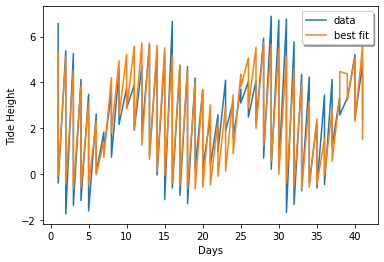

In [69]:
plt.plot(day, tide, label="data")
plt.plot(day, oscicllationFunc(times, *popt), label="best fit")
plt.xlabel("Days")
plt.ylabel("Tide Height")
plt.legend(loc='best', fancybox=True, shadow=True)
plt.savefig("TidalMeasurements.pdf")

In [70]:
residuals = tide - oscicllationFunc(times, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((tide-np.mean(tide))**2)
r_squared = 1 - (ss_res / ss_tot)
r_squared

0.8814756009892044

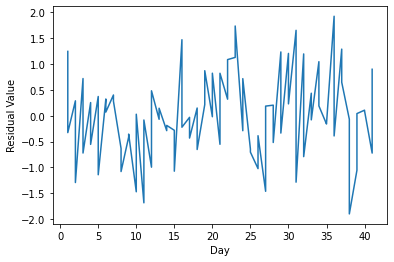

In [71]:
plt.plot(day, residuals)
plt.xlabel("Day")
plt.ylabel("Residual Value")
plt.savefig("ResidualPlot.pdf")

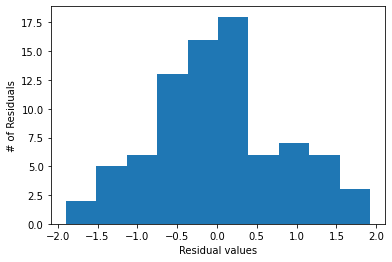

In [72]:
plt.hist(residuals)
plt.xlabel("Residual values")
plt.ylabel("# of Residuals")
plt.savefig("ResidualsHistogram.pdf")

In [73]:
tides_std = np.std(tide)
tides_std

2.38064082624931

In [74]:
max_tide = np.max(tide)
max_tide

tsunami_tide = max_tide + 2
tsunami_tide

8.89